In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df= pd.read_csv("messy_ice_detention.csv", skiprows=6, encoding='latin1')

In [4]:
df.head()

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,45554
3,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      134 non-null    object 
 1   City                      134 non-null    object 
 2   State                     134 non-null    object 
 3   Level A                   134 non-null    float64
 4   Level B                   134 non-null    float64
 5   Level C                   134 non-null    float64
 6   Level D                   134 non-null    float64
 7   Last Inspection End Date  117 non-null    object 
dtypes: float64(4), object(4)
memory usage: 8.5+ KB


In [6]:
def clean_name(name):
    return re.sub(r'[+$%&^*()\-]', '', name)


In [7]:
# Applying the cleaning function to the 'Name' column
df['Name'] = df['Name'].apply(clean_name)


In [8]:
df

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,45554
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...
129,WASHINGTON COUNTY DETENTION CENTER,FAYETTEVILLE,AR,0.922156,1.119760,1.203593,0.401198,45232
130,WASHOE COUNTY JAIL,RENO,NV,0.814371,2.023952,3.443114,3.700599,45603
131,WEBB COUNTY DETENTION CENTER CCA,LAREDO,TX,234.455090,4.335329,27.724551,52.934132,45694
132,WINN CORRECTIONAL CENTER,WINNFIELD,LA,1013.023952,214.772455,187.005988,94.580838,45673


### Covert the excel serial data format to data-time format

In [9]:
def parse_mixed_date(val):
    try:
        # Try to convert to float (Excel serial date)
        num = float(val)
        return pd.to_datetime(num, origin='1899-12-30', unit='D')
    except:
        try:
            # If not a number, parse as standard date string
            return pd.to_datetime(val, errors='coerce')
        except:
            return pd.NaT

# Applying the parser function
df['Last Inspection End Date'] = df['Last Inspection End Date'].apply(parse_mixed_date)

In [10]:
df.head()

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaT


In [11]:
df.iloc[123]

Name                                           
City                                      DOVER
State                                        NH
Level A                                     0.0
Level B                                     0.0
Level C                               49.161677
Level D                               41.335329
Last Inspection End Date    2024-09-12 00:00:00
Name: 123, dtype: object

In [12]:
# We have datarows with null values.

In [13]:
df.isnull().sum()

Name                         0
City                         0
State                        0
Level A                      0
Level B                      0
Level C                      0
Level D                      0
Last Inspection End Date    17
dtype: int64

In [14]:
# We have space as null values which aren't defined by pandas automatically so replacing spaces with null values 

In [15]:
df.replace(["NA", "N/A", "na", "n/a"," ", "", "null"], pd.NA, inplace=True)


In [16]:
df.isnull().sum()

Name                         2
City                         1
State                        2
Level A                      0
Level B                      0
Level C                      0
Level D                      0
Last Inspection End Date    17
dtype: int64

In [17]:
# here we can see now we don't have name for detension facility for 2 rows and city name for 1 row and state name for 2 rows.

In [18]:
df[df.isnull().any(axis=1)]
# we can see the rows containing null values

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaT
6,ATLANTA US PEN,ATLANTA,<NA>,17.341317,3.610778,3.053892,2.724551,NaT
8,BERLIN FED. CORR. INST.,BERLIN,NH,1.748503,0.089800,0.970060,0.712575,NaT
11,BROWARD COUNTY JAIL,FT.LAUDERDALE,FL,0.335329,0.209581,1.053892,0.233533,NaT
22,CIMMARR.ON CORR FACILITY,CUSHING,OK,17.059880,3.670659,0.311377,0.000000,NaT
38,EL PASO SOFT SIDED FACILI,EL PASO,TX,1.059880,0.802395,0.497006,0.155689,NaT
45,FDC PHILADELPHIA,PHILADELPHIA,PA,9.425150,1.676647,3.347305,4.616766,NaT
51,GEAUGA COUNTY JAIL,<NA>,OH,24.676647,13.059880,7.580838,2.694611,2025-01-30
55,GREENE COUNTY JAIL,SPRINGFIELD,MO,14.502994,3.083832,8.598802,5.886228,NaT
58,HONOLULU FEDERAL DETENTION CENTER,HONOLULU,HI,3.814371,6.970060,10.586826,3.988024,NaT


### Replacing the null value of city and state with appropriate data

In [19]:
df.loc[6, 'State'] = 'GA'

In [20]:
df.loc[51, 'City'] = 'Chardon'

In [21]:
df.loc[71, 'State'] = 'TX'

In [22]:
df.loc[116, 'Name'] = 'SHERBURNE COUNTY JAIL'

In [23]:
df.loc[123, 'Name'] = 'STRAFFORD COUNTY CORRECTIONS'

In [24]:
df.isnull().sum()

Name                         0
City                         0
State                        0
Level A                      0
Level B                      0
Level C                      0
Level D                      0
Last Inspection End Date    17
dtype: int64

In [25]:
df[df.isnull().any(axis=1)]
# we can see the rows containing null values

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaT
6,ATLANTA US PEN,ATLANTA,GA,17.341317,3.610778,3.053892,2.724551,NaT
8,BERLIN FED. CORR. INST.,BERLIN,NH,1.748503,0.089800,0.970060,0.712575,NaT
11,BROWARD COUNTY JAIL,FT.LAUDERDALE,FL,0.335329,0.209581,1.053892,0.233533,NaT
22,CIMMARR.ON CORR FACILITY,CUSHING,OK,17.059880,3.670659,0.311377,0.000000,NaT
38,EL PASO SOFT SIDED FACILI,EL PASO,TX,1.059880,0.802395,0.497006,0.155689,NaT
45,FDC PHILADELPHIA,PHILADELPHIA,PA,9.425150,1.676647,3.347305,4.616766,NaT
55,GREENE COUNTY JAIL,SPRINGFIELD,MO,14.502994,3.083832,8.598802,5.886228,NaT
58,HONOLULU FEDERAL DETENTION CENTER,HONOLULU,HI,3.814371,6.970060,10.586826,3.988024,NaT
73,LEAV@ENWORTH US PENITENTIARY,LEAVENWORTH,KS,5.652695,1.461078,3.574850,4.359281,NaT


In [26]:
df

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaT
...,...,...,...,...,...,...,...,...
129,WASHINGTON COUNTY DETENTION CENTER,FAYETTEVILLE,AR,0.922156,1.119760,1.203593,0.401198,2023-11-02
130,WASHOE COUNTY JAIL,RENO,NV,0.814371,2.023952,3.443114,3.700599,2024-11-07
131,WEBB COUNTY DETENTION CENTER CCA,LAREDO,TX,234.455090,4.335329,27.724551,52.934132,2025-02-06
132,WINN CORRECTIONAL CENTER,WINNFIELD,LA,1013.023952,214.772455,187.005988,94.580838,2025-01-16


In [27]:
level_cols = ['Level A', 'Level B', 'Level C', 'Level D']

# Creating a 'Total Population' column
df['Total Population'] = df[level_cols].sum(axis=1)

In [28]:
df

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,Total Population
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16,2153.874252
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18,65.964072
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19,20.059880
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29,313.425150
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaT,1.239557
...,...,...,...,...,...,...,...,...,...
129,WASHINGTON COUNTY DETENTION CENTER,FAYETTEVILLE,AR,0.922156,1.119760,1.203593,0.401198,2023-11-02,3.646707
130,WASHOE COUNTY JAIL,RENO,NV,0.814371,2.023952,3.443114,3.700599,2024-11-07,9.982036
131,WEBB COUNTY DETENTION CENTER CCA,LAREDO,TX,234.455090,4.335329,27.724551,52.934132,2025-02-06,319.449102
132,WINN CORRECTIONAL CENTER,WINNFIELD,LA,1013.023952,214.772455,187.005988,94.580838,2025-01-16,1509.383233


In [29]:
top10 = df.sort_values(by='Total Population', ascending=False).head(10)

In [30]:
top10

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,Total Population
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16,2153.874252
119,SOUTH TEXAS ICE PROCESSING CENTER,PEARSALL,TX,1299.083832,106.125749,188.724551,68.197605,2025-02-06,1662.131736
122,STEWART DETENTION CENTER,LUMPKIN,GA,743.311377,194.928144,371.562874,328.041916,2024-08-01,1637.844311
132,WINN CORRECTIONAL CENTER,WINNFIELD,LA,1013.023952,214.772455,187.005988,94.580838,2025-01-16,1509.383233
93,OTAY MESA DETENTION CENTER,SAN DIEGO,CA,800.826347,470.119760,45.479042,46.215569,2024-11-07,1362.640719
41,ELOY FEDERAL CONTRACT FACILITY,ELOY,AZ,1041.886228,45.538922,114.688623,125.610778,2024-10-31,1327.724551
83,MOSHANNON VALLEY PROCESSING CENTER,PHILIPSBURG,PA,205.245509,96.467066,542.275449,402.059880,2025-03-06,1246.047904
82,MONTGOMERY ICE PROCESSING CENTER,CONROE,TX,149.556886,561.425150,355.269461,160.976048,2024-12-05,1227.227545
18,CENTRAL LOUISIANA ICE PROCESSING CENTER CLIPC,JENA,LA,410.970060,221.209581,344.790419,207.161677,2025-01-09,1184.131736
31,DENVER CONTRACT DETENTION FACILITY,AURORA,CO,624.568862,190.508982,189.658683,141.365270,2025-02-13,1146.101796



Top 10 Facilities by Population:
                                              Name         City State  \
0                          ADAMS COUNTY DET CENTER      NATCHEZ    MS   
119              SOUTH TEXAS ICE PROCESSING CENTER     PEARSALL    TX   
122                       STEWART DETENTION CENTER      LUMPKIN    GA   
132                       WINN CORRECTIONAL CENTER    WINNFIELD    LA   
93                      OTAY MESA DETENTION CENTER    SAN DIEGO    CA   
41                  ELOY FEDERAL CONTRACT FACILITY         ELOY    AZ   
83              MOSHANNON VALLEY PROCESSING CENTER  PHILIPSBURG    PA   
82                MONTGOMERY ICE PROCESSING CENTER       CONROE    TX   
18   CENTRAL LOUISIANA ICE PROCESSING CENTER CLIPC         JENA    LA   
31              DENVER CONTRACT DETENTION FACILITY       AURORA    CO   

     Total Population  
0         2153.874252  
119       1662.131736  
122       1637.844311  
132       1509.383233  
93        1362.640719  
41        1327.724

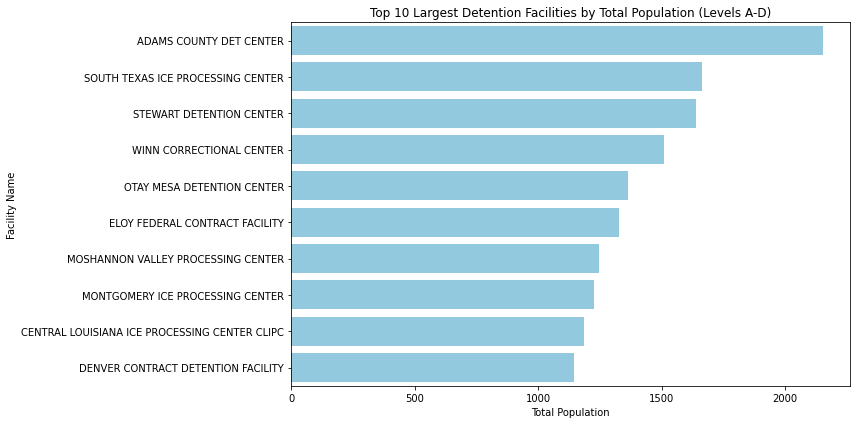

In [31]:
# Display top 10
print("\nTop 10 Facilities by Population:")
print(top10[['Name', 'City', 'State', 'Total Population']])

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='Total Population', y='Name', color='skyblue')
plt.title('Top 10 Largest Detention Facilities by Total Population (Levels A-D)')
plt.xlabel('Total Population')
plt.ylabel('Facility Name')
plt.tight_layout()
plt.show()